<a href="https://colab.research.google.com/github/asantesamuel/Brain_tumor_training_model/blob/main/brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
#collecting data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


#Data Preprocessing

##Training Image Processing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Brain_Tumor/Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 2870 files belonging to 4 classes.


##Validation Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Brain_Tumor/Testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 394 files belonging to 4 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolutionary Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu', input_shape=[150, 150, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #drop some neuron to avoid overfitting

In [ ]:
#output layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

#Compiling And Training Phase

##Changing the input Shape specifically to 3 channels


In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 144, 144, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 142, 142, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 71, 71, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 69, 69, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 67, 67, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 65, 65, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      31,490,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,813,220 (121.36 MB)

 Trainable params: 31,813,220 (121.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)

Epoch 1/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 835s 9s/step - accuracy: 0.4090 - loss: 2.4553 - val_accuracy: 0.3807 - val_loss: 2.0725
Epoch 2/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 734s 8s/step - accuracy: 0.6713 - loss: 0.8011 - val_accuracy: 0.4949 - val_loss: 1.4944
Epoch 3/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 737s 8s/step - accuracy: 0.8091 - loss: 0.5229 - val_accuracy: 0.5635 - val_loss: 1.8321
Epoch 4/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 688s 8s/step - accuracy: 0.8676 - loss: 0.3565 - val_accuracy: 0.6599 - val_loss: 1.4980
Epoch 5/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 744s 8s/step - accuracy: 0.9169 - loss: 0.2224 - val_accuracy: 0.7081 - val_loss: 2.2378
Epoch 6/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 703s 8s/step - accuracy: 0.9341 - loss: 0.1932 - val_accuracy: 0.7208 - val_loss: 1.8088
Epoch 7/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 722s 8s/step - accuracy: 0.9558 - loss: 0.1412 - val_accuracy: 0.7462 - val_loss: 1.8693
Epoch 8/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 696s 8s/step - accuracy: 0.9837 - loss: 0.0463 - val_accuracy: 0.7538 - v

#Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'accuracy': [0.4933798015117645,
  0.6804878115653992,
  0.8135888576507568,
  0.8665505051612854,
  0.9205574989318848,
  0.9324041604995728,
  0.9616724848747253,
  0.9843205809593201,
  0.9860627055168152,
  0.9860627055168152,
  0.988153338432312,
  0.9815331101417542,
  0.9878048896789551,
  0.9912891983985901,
  0.9933797717094421,
  0.990592360496521,
  0.988153338432312,
  0.986759603023529,
  0.986759603023529,
  0.9982578158378601,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9958187937736511,
  0.9853658676147461,
  0.998954713344574,
  0.9749128818511963,
  0.9770034551620483,
  0.9895470142364502],
 'loss': [1.4368656873703003,
  0.7751568555831909,
  0.5007799863815308,
  0.3590976893901825,
  0.21733923256397247,
  0.19217950105667114,
  0.11880140006542206,
  0.04779641330242157,
  0.059007540345191956,
  0.049085620790719986,
  0.045130182057619095,
  0.06943662464618683,
  0.046462252736091614,
  0.03391118347644806,
  0.028497032821178436,
  0.032070230692625046,
 

In [ ]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Calculating Accuracy Of Model Achieved on Validation set

In [ ]:
print(("Validation Set Accuracy {} %".format(training_history.history['val_accuracy'][-1]*100)))

Validation Set Accuracy 77.66497731208801 %


#Accuracy Visualization

##Training Visualization

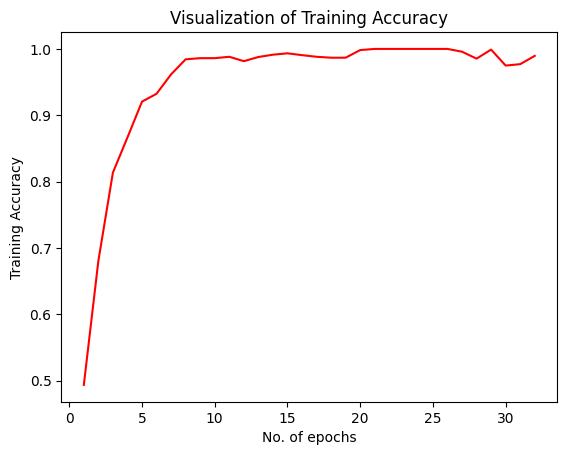

In [ ]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No. of epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy')
plt.show()

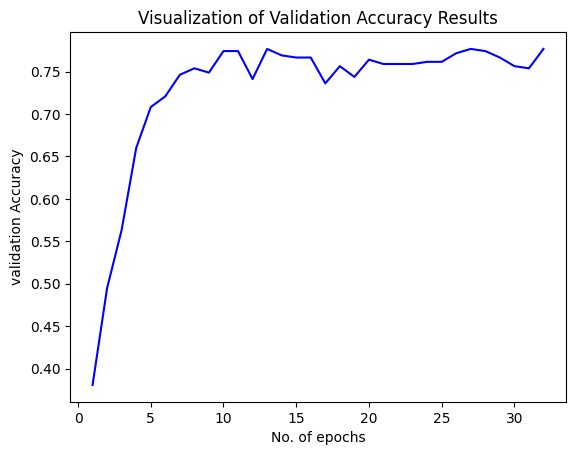

In [ ]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel('No. of epochs')
plt.ylabel('validation Accuracy')
plt.title('Visualization of Validation Accuracy Results')
plt.show()